In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, KMeans
from sklearn.neighbors import KNeighborsClassifier

In [88]:
def test():
    p_success = 0.6
    return np.random.random() > 1 - p_success

def generate_possibilities_2d(min, max, num_points):
    nx = np.linspace(min, max, num_points)
    ny = np.linspace(min, max, num_points)
    return np.meshgrid(nx, ny)

def get_random_coordinate(n_points: int, n_dimensions: int=2):
    x = np.random.randint(0, n_points)
    y = np.random.randint(0, n_points)

    return x, y

def get_next_coordinate():
    """
    ----
    Available hyperparameters:
    - Max clusters
    - Radius proportion
    - Chance of point inside radius
    """
    return np.random.random()

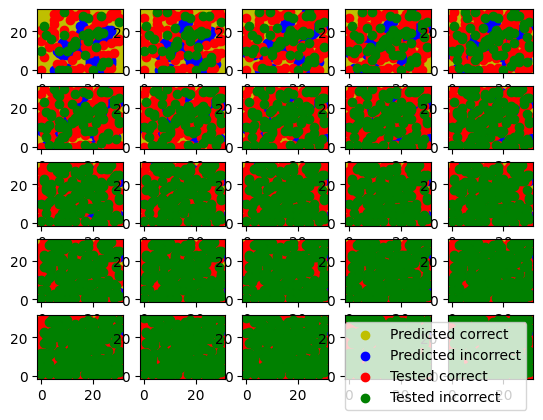

Predicting remaining datapoints


In [93]:
NUM_POINTS = 31 # Number of values tested for each parameter
INITIALISATION_SIZE = 100
EPOCH_SIZE = 25 # Number of points to test before reclassifying predictions
NUM_EPOCHS = 25

CHANCE_TEST_EXPECTED_POSITIVE = 0.8 # The chance to choose a grid position in our expected SPS confidence region

plot_data = {}

# Grid is made up of NUM_POINTS x NUMPOINTS array
# output[x][y]

xv, yv = generate_possibilities_2d(-1, 1, NUM_POINTS)

# Build list of possible coordinates
remaining_coords = set()
for x in range(NUM_POINTS):
    coords= [(x, y) for y in np.arange(NUM_POINTS)]
    for coord in coords:
        remaining_coords.add(coord)


results = -1 * np.ones( (NUM_POINTS, NUM_POINTS) )
output = []

for n_epoch in range(0, NUM_EPOCHS):

    if n_epoch == 0:
        for i in range(INITIALISATION_SIZE):
            x, y = get_random_coordinate(NUM_POINTS)
            while results[x,y] != -1:
                x, y = get_random_coordinate(NUM_POINTS)
            coord = (x,y)

            results[coord] = test()
            remaining_coords.remove(coord)
            output.append([x, y, results[coord]])
    else:
        # Re-test these points
        for i in range(EPOCH_SIZE):
            is_test_confidence_region = np.random.random() < CHANCE_TEST_EXPECTED_POSITIVE
            is_coord_untested = False
            while not is_coord_untested:
                if is_test_confidence_region and len(pred_success) > 0:
                    # Test random point from expected confidence region

                    index = np.random.randint(0, len(pred_success) - 1) if len(pred_success) > 1 else 0
                    coord = pred_success[index][:2]
                    if index == 0:
                        pred_success = pred_success[1:]
                    else:
                        pred_success = np.concatenate([pred_success[:index-1], pred_success[index:]])
                elif len(pred_fail) > 0:
                    # Test random point from outside expected confidence region
                    index = np.random.randint(0, len(pred_fail) - 1) if len(pred_fail) > 1 else 0
                    coord = pred_fail[index][:2]
                    if index == 0:
                        pred_fail = pred_fail[1:]
                    else:
                        pred_fail = np.concatenate([pred_fail[:index-1], pred_fail[index:]])

                else:
                    print("Run out of points to test! Stopping")
                    break

                coord = tuple(coord.astype(int))
                x = coord[0]
                y = coord[1]
                is_coord_untested = coord in remaining_coords

            results[coord] = test()
            remaining_coords.remove(coord)
            output.append([x, y, results[coord]])

    X = np.array(output)[:, 0:2]
    y = np.array(output)[:, 2]

    knn = KNeighborsClassifier(n_neighbors=7, weights="distance")
    knn.fit(X, y)

    X_test = np.array([list(x) for x in list(remaining_coords)])
    y_pred = knn.predict(X_test)

    # Concatenate the results
    concat = np.concatenate([X_test, np.array([y_pred]).transpose()], axis=1)
    pred_success = concat[np.where(concat[:,2] == 1)]
    pred_fail = concat[np.where(concat[:,2] == 0)]

    correct = np.where([results == 1])
    correct_x = correct[1]
    correct_y = correct[2]

    incorrect = np.where([results == 0])
    incorrect_x = incorrect[1]
    incorrect_y = incorrect[2]

    correct = np.where([results == 1])
    correct_x = correct[1]
    correct_y = correct[2]

    incorrect = np.where([results == 0])
    incorrect_x = incorrect[1]
    incorrect_y = incorrect[2]

    plot_data["correct_x_%d" % n_epoch] = correct_x.copy()
    plot_data["correct_y_%d" % n_epoch] = correct_y.copy()
    plot_data["incorrect_x_%d" % n_epoch] = incorrect_x.copy()
    plot_data["incorrect_y_%d" % n_epoch] = incorrect_y.copy()
    plot_data["pred_success_x_%d" % n_epoch] = pred_success[:,0].copy()
    plot_data["pred_success_y_%d" % n_epoch] = pred_success[:,1].copy()
    plot_data["pred_fail_x_%d" % n_epoch] = pred_fail[:,0].copy()
    plot_data["pred_fail_y_%d" % n_epoch] = pred_fail[:,1].copy()

plt.figure()
for n_epoch in range(NUM_EPOCHS):
# Plot the initialised grid
    plt.subplot(5, 5, n_epoch+1)

    plt.scatter(plot_data["pred_success_x_%d" % n_epoch],   plot_data["pred_success_y_%d" % n_epoch], color='y')
    plt.scatter(plot_data["pred_fail_x_%d" % n_epoch],      plot_data["pred_fail_y_%d" % n_epoch], color='b')
    plt.scatter(plot_data["correct_x_%d" % n_epoch],        plot_data["correct_y_%d" % n_epoch], color='r')
    plt.scatter(plot_data["incorrect_x_%d" % n_epoch],      plot_data["incorrect_y_%d" % n_epoch], color='g')
plt.legend(['Predicted correct', 'Predicted incorrect', 'Tested correct', 'Tested incorrect'])
plt.show()
print("Predicting remaining datapoints")

# print(y_pred == 1)


{0.3817292412114516, 0.6305279053689998, 0.8305574337888029, 0.6007653090494964, 0.6217140567760857, 0.24106059307295247, 0.31703968479174793, 0.19628959074796215, 0.5943540913247495, 0.0952654203043547, 0.06979999963487948, 0.5312067243178885, 0.7659357966540519, 0.014179925047111519, 0.42317115891082246, 0.3353016164252731, 0.3419510114480977, 0.5256583223120261, 0.7637460970126979, 0.25844170082817386, 0.454277372915183, 0.5954857815774734, 0.06592761421317117, 0.2601704901878683, 0.4682298527984521, 0.5764395860408402, 0.3900576793680155, 0.9224956745605073, 0.12735230805598163, 0.9372680853713352, 0.6820264026844026, 0.04425326835695287, 0.3071377558959937, 0.2621387108298333, 0.06268521672047012, 0.3073923526120206, 0.10503944583771929, 0.42502326003069246, 0.29139796297784226, 0.9907132774615867, 0.7449985208584639, 0.3303744651699275, 0.28575873719694767, 0.26037059105860605, 0.03601498261297886, 0.18792398536888621, 0.9627015851388695, 0.6023649705794688, 0.805502270371452}
{0

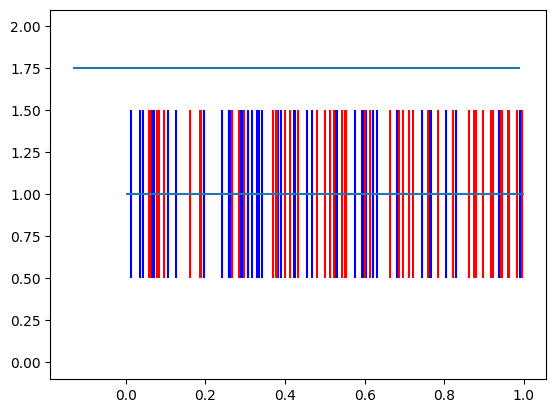

In [ ]:
success_coords = set()
fail_coords = set()

for i in range(100):
    coordinate = get_next_coordinate()
    is_success = test()

    if is_success:
        success_coords.add(coordinate)
    else:
        fail_coords.add(coordinate)
print(success_coords)
print(fail_coords)

success_arr = np.array(list(success_coords))
radius = np.abs((success_arr - success_arr.mean())).max()

fail_arr = np.array(list(fail_coords))

print("Mean:", success_arr.mean())
print("Radius:", radius)

plt.figure()
plt.eventplot(success_arr, orientation='horizontal', colors='b')
plt.eventplot(fail_arr, orientation='horizontal', colors='r')
# plt.eventplot([success_arr.mean(), success_arr.mean()-radius, success_arr.mean()+radius], orientation='horizontal', colors='r')

plt.hlines(1,0,1)
plt.hlines(1.75,success_arr.mean()-radius, success_arr.mean()+radius)

plt.show()